In [1]:
import pandas as pd


In [2]:
cars = pd.read_csv("https://raw.githubusercontent.com/juliandnl/redi_ss20/master/cars.csv")


In [7]:
cars.sample(5)

,Make,Model,Year,Variant,Kms,Price,Doors,Kind,Location
4725,Ford,Mondeo,2011,2.0 Titanium Gi Ecoboost 240cv At,85000,398500,4.0,Sedán,Bs.as. G.b.a. Sur
187,Volkswagen,Golf,2017,1.4 Highline Tsi Dsg,16000,890000,5.0,Hatchback,Bs.as. G.b.a. Oeste
3879,Honda,City,2011,1.5 Lx Mt 120cv,76000,219000,4.0,Sedán,Bs.as. G.b.a. Norte
3728,Ford,Focus III,2014,2.0 Se,88000,365000,5.0,Hatchback,Chubut
8175,Volkswagen,Fox,2013,1.6 Trendline,120000,230000,5.0,Hatchback,Córdoba



1. How old (in years) are the cars in our dataset?

We don't have a column providing us a direct information to answer this question. However, we have Year column which we can use to extract the information from.

In [12]:
# create hard-coded date
today_hardcoded = 2022
print(today_hardcoded)

print(type(today_hardcoded))

2022
<class 'int'>


In [13]:
from datetime import date

today = date.today()
print(today)

print(type(today))

2023-10-16
<class 'datetime.date'>


In [17]:
print('Year: ' + str(today.year))
print('Month: ' + str(today.month))
print('Day: ' + str(today.day))

Year: 2023
Month: 10
Day: 16


In [18]:
Now, when we already have the information about the current day, let's try to calculate the age of the first car in our dataset:

SyntaxError: ignored

In [19]:
first_car = cars.loc[0]

In [20]:
first_car

Make              Volkswagen
Model                  Vento
Year                    2012
Variant     2.5 Luxury 170cv
Kms                    99950
Price                 360000
Doors                    4.0
Kind                   Sedán
Location             Córdoba
Name: 0, dtype: object

In [22]:
car_age_in_years = today.year - first_car.Year

In [23]:
car_age_in_years

11

Alright! Right now we know how to calculate a single age difference. Let's see how to automate this process and calculate this information for all of the cars at once.

In [24]:
def calculate_age_of_a_car(year):
  return today.year - year

cars['Age'] = cars.Year.apply(calculate_age_of_a_car)

In [25]:
cars.head()

,Make,Model,Year,Variant,Kms,Price,Doors,Kind,Location,Age
0,Volkswagen,Vento,2012,2.5 Luxury 170cv,99950,360000,4.0,Sedán,Córdoba,11
1,Ford,Ranger,2012,2.3 Cd Xl Plus 4x2,140000,320000,2.0,Pick-Up,Entre Ríos,11
2,Volkswagen,Fox,2011,1.6 Trendline,132000,209980,5.0,Hatchback,Bs.as. G.b.a. Sur,12
3,Ford,Ranger,2017,3.2 Cd Xls Tdci 200cv Automática,13000,798000,4.0,Pick-Up,Neuquén,6
4,Volkswagen,Gol,2013,1.4 Power 83cv 3 p,107000,146000,3.0,Hatchback,Córdoba,10


Let's answer our question: How old (in years) are the cars in our dataset?

In [26]:
ages = cars.Age.value_counts()

In [33]:
ages

10    2089
12    2012
11    1834
9     1417
8     1234
7      843
6      473
5       98
Name: Age, dtype: int64

In [30]:
ages.plot.barh

<bound method PlotAccessor.barh of <pandas.plotting._core.PlotAccessor object at 0x78e18cd2bc10>>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Make      10000 non-null  object 
 1   Model     10000 non-null  object 
 2   Year      10000 non-null  int64  
 3   Variant   10000 non-null  object 
 4   Kms       10000 non-null  int64  
 5   Price     10000 non-null  int64  
 6   Doors     10000 non-null  float64
 7   Kind      10000 non-null  object 
 8   Location  10000 non-null  object 
 9   Age       10000 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 781.4+ KB



Anonymous (lambda) functions

    Anonymous function is a function that is defined without a name
    While normal functions are defined using def keyword, anonymous functions are defined using lambda keyword.
    Anonymous functions are also called lambda functions



In [36]:
double = lambda x: x*2
double(5)

10

In [38]:
def double2(x):
  return x*2
double2(5)

10

Coming back to the example of cars and their age, the lambda function would look like this:

In [39]:
today = date.today()

cars['Age'] = cars.Year.apply(lambda x: today.year - x)

In [40]:
cars.head(5)

,Make,Model,Year,Variant,Kms,Price,Doors,Kind,Location,Age
0,Volkswagen,Vento,2012,2.5 Luxury 170cv,99950,360000,4.0,Sedán,Córdoba,11
1,Ford,Ranger,2012,2.3 Cd Xl Plus 4x2,140000,320000,2.0,Pick-Up,Entre Ríos,11
2,Volkswagen,Fox,2011,1.6 Trendline,132000,209980,5.0,Hatchback,Bs.as. G.b.a. Sur,12
3,Ford,Ranger,2017,3.2 Cd Xls Tdci 200cv Automática,13000,798000,4.0,Pick-Up,Neuquén,6
4,Volkswagen,Gol,2013,1.4 Power 83cv 3 p,107000,146000,3.0,Hatchback,Córdoba,10



2. What is the min and max kilometers per year that the cars in the dataset traveled?
_
The procedure here will be very similar. We will create a new column KM_per_year to answer this question.


In [42]:
def calculate_km_per_year(row):
  return row.Kms / row.Age


cars['KM_per_year'] = cars.apply(calculate_km_per_year, axis =1)

In [43]:
cars.head()

,Make,Model,Year,Variant,Kms,Price,Doors,Kind,Location,Age,KM_per_year
0,Volkswagen,Vento,2012,2.5 Luxury 170cv,99950,360000,4.0,Sedán,Córdoba,11,9086.363636
1,Ford,Ranger,2012,2.3 Cd Xl Plus 4x2,140000,320000,2.0,Pick-Up,Entre Ríos,11,12727.272727
2,Volkswagen,Fox,2011,1.6 Trendline,132000,209980,5.0,Hatchback,Bs.as. G.b.a. Sur,12,11000.000000
3,Ford,Ranger,2017,3.2 Cd Xls Tdci 200cv Automática,13000,798000,4.0,Pick-Up,Neuquén,6,2166.666667
4,Volkswagen,Gol,2013,1.4 Power 83cv 3 p,107000,146000,3.0,Hatchback,Córdoba,10,10700.000000


In [44]:
round(cars.KM_per_year.max(), 1)

18181.8

In [45]:
cars.KM_per_year.min()

566.6666666666666

The maximum kilometer per year is 20.000 km/year and the minimum is 618 km/year.


3. What is the distribution of horsepower?

How to find horsepower? If you take a look on Variant column you will see that it contains a few information there. But the format is always the same - it starts with a number representing the horsepower (e.g. 2.5, 2.3...). And we can extract this information from there.


In [47]:
def get_horsepower(variant):
  return variant.split(' ')[0]

cars['Horsepower'] = cars.Variant.apply(lambda x: get_horsepower(x))

In [48]:
cars.head()

,Make,Model,Year,Variant,Kms,Price,Doors,Kind,Location,Age,KM_per_year,Horsepower
0,Volkswagen,Vento,2012,2.5 Luxury 170cv,99950,360000,4.0,Sedán,Córdoba,11,9086.363636,2.5
1,Ford,Ranger,2012,2.3 Cd Xl Plus 4x2,140000,320000,2.0,Pick-Up,Entre Ríos,11,12727.272727,2.3
2,Volkswagen,Fox,2011,1.6 Trendline,132000,209980,5.0,Hatchback,Bs.as. G.b.a. Sur,12,11000.000000,1.6
3,Ford,Ranger,2017,3.2 Cd Xls Tdci 200cv Automática,13000,798000,4.0,Pick-Up,Neuquén,6,2166.666667,3.2
4,Volkswagen,Gol,2013,1.4 Power 83cv 3 p,107000,146000,3.0,Hatchback,Córdoba,10,10700.000000,1.4


<Axes: >

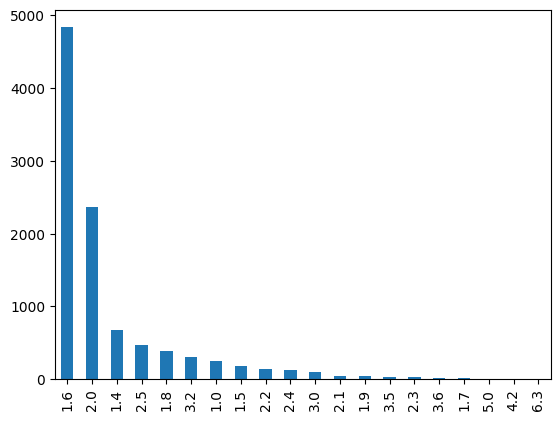

In [49]:
cars.Horsepower.value_counts().plot.bar() #distribution

In [50]:
cars.Horsepower.value_counts()

1.6    4839
2.0    2365
1.4     679
2.5     468
1.8     392
3.2     301
1.0     248
1.5     184
2.2     136
2.4     123
3.0      97
2.1      42
1.9      42
3.5      25
2.3      23
3.6      19
1.7       9
5.0       4
4.2       3
6.3       1
Name: Horsepower, dtype: int64

Add a new column with random values to a dataframe:

Let's imagine that our dataset has an additional column Sold_date (we will add some random data here on our own).

    How many cars per month are sold?


In [56]:
from random import randrange
import datetime
import numpy as np

start_date = datetime.datetime(2019, 1, 1, 12, 0)

def create_new_date(start=start_date):
  if randrange(10) > 2:
    return start_date + datetime.timedelta(days=randrange(365))
  return np.nan

cars['Sold_date'] = cars.Year.apply(lambda x: create_new_date())

In [57]:
cars.head()

,Make,Model,Year,Variant,Kms,Price,Doors,Kind,Location,Age,KM_per_year,Horsepower,Sold_date
0,Volkswagen,Vento,2012,2.5 Luxury 170cv,99950,360000,4.0,Sedán,Córdoba,11,9086.363636,2.5,NaT
1,Ford,Ranger,2012,2.3 Cd Xl Plus 4x2,140000,320000,2.0,Pick-Up,Entre Ríos,11,12727.272727,2.3,2019-09-28 12:00:00
2,Volkswagen,Fox,2011,1.6 Trendline,132000,209980,5.0,Hatchback,Bs.as. G.b.a. Sur,12,11000.000000,1.6,2019-09-30 12:00:00
3,Ford,Ranger,2017,3.2 Cd Xls Tdci 200cv Automática,13000,798000,4.0,Pick-Up,Neuquén,6,2166.666667,3.2,2019-06-30 12:00:00
4,Volkswagen,Gol,2013,1.4 Power 83cv 3 p,107000,146000,3.0,Hatchback,Córdoba,10,10700.000000,1.4,2019-11-30 12:00:00


In [59]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Make         10000 non-null  object        
 1   Model        10000 non-null  object        
 2   Year         10000 non-null  int64         
 3   Variant      10000 non-null  object        
 4   Kms          10000 non-null  int64         
 5   Price        10000 non-null  int64         
 6   Doors        10000 non-null  float64       
 7   Kind         10000 non-null  object        
 8   Location     10000 non-null  object        
 9   Age          10000 non-null  int64         
 10  KM_per_year  10000 non-null  float64       
 11  Horsepower   10000 non-null  object        
 12  Sold_date    7036 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 1015.8+ KB



Saving the data to a file and reading it from a file

Let's save this csv file and read that again from the file!


In [60]:
cars.to_csv("cars.csv")

In [61]:
cars_from_file = pd.read_csv("cars.csv")

In [62]:
cars_from_file

,Unnamed: 0,Make,Model,Year,Variant,Kms,Price,Doors,Kind,Location,Age,KM_per_year,Horsepower,Sold_date
0,0,Volkswagen,Vento,2012,2.5 Luxury 170cv,99950,360000,4.0,Sedán,Córdoba,11,9086.363636,2.5,NaN
1,1,Ford,Ranger,2012,2.3 Cd Xl Plus 4x2,140000,320000,2.0,Pick-Up,Entre Ríos,11,12727.272727,2.3,2019-09-28 12:00:00
2,2,Volkswagen,Fox,2011,1.6 Trendline,132000,209980,5.0,Hatchback,Bs.as. G.b.a. Sur,12,11000.000000,1.6,2019-09-30 12:00:00
3,3,Ford,Ranger,2017,3.2 Cd Xls Tdci 200cv Automática,13000,798000,4.0,Pick-Up,Neuquén,6,2166.666667,3.2,2019-06-30 12:00:00
4,4,Volkswagen,Gol,2013,1.4 Power 83cv 3 p,107000,146000,3.0,Hatchback,Córdoba,10,10700.000000,1.4,2019-11-30 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,Ford,Focus III,2016,2.0 Se,67000,399000,5.0,Hatchback,Bs.as. G.b.a. Oeste,7,9571.428571,2.0,NaN
9996,9996,Volkswagen,Bora,2012,1.9 Trendline I 100cv,120000,240000,4.0,Sedán,Buenos Aires Interior,11,10909.090909,1.9,2019-12-28 12:00:00
9997,9997,Ford,Fiesta Kinetic Design,2012,1.6 Design 120cv Titanium,89000,250000,5.0,Hatchback,Tucumán,11,8090.909091,1.6,2019-06-11 12:00:00
9998,9998,Ford,Fiesta Kinetic Design,2013,1.6 Design 120cv Titanium,76000,295000,5.0,Hatchback,Buenos Aires Interior,10,7600.000000,1.6,NaN


In [63]:
cars_from_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   10000 non-null  int64  
 1   Make         10000 non-null  object 
 2   Model        10000 non-null  object 
 3   Year         10000 non-null  int64  
 4   Variant      10000 non-null  object 
 5   Kms          10000 non-null  int64  
 6   Price        10000 non-null  int64  
 7   Doors        10000 non-null  float64
 8   Kind         10000 non-null  object 
 9   Location     10000 non-null  object 
 10  Age          10000 non-null  int64  
 11  KM_per_year  10000 non-null  float64
 12  Horsepower   10000 non-null  float64
 13  Sold_date    7036 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 1.1+ MB



Datetime columns

Notice that datetime values when saved to file and read again, it changes to object data type. But we can transform it to datetime again very easily!


In [65]:
cars_from_file['Sold_date'] = pd.to_datetime(cars_from_file['Sold_date'])

In [66]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Make         10000 non-null  object        
 1   Model        10000 non-null  object        
 2   Year         10000 non-null  int64         
 3   Variant      10000 non-null  object        
 4   Kms          10000 non-null  int64         
 5   Price        10000 non-null  int64         
 6   Doors        10000 non-null  float64       
 7   Kind         10000 non-null  object        
 8   Location     10000 non-null  object        
 9   Age          10000 non-null  int64         
 10  KM_per_year  10000 non-null  float64       
 11  Horsepower   10000 non-null  object        
 12  Sold_date    7036 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 1015.8+ KB


We will group our dataset by month (since we have the data only from one year) and calculate how many of them we have for each group:

In [68]:
grouped = cars_from_file.groupby(by=cars_from_file.Sold_date.dt.month)[['Year']].size()
grouped.index.rename('Sold_date_month', inplace=True)
grouped


Sold_date_month
1.0     583
2.0     548
3.0     587
4.0     592
5.0     613
6.0     556
7.0     568
8.0     579
9.0     610
10.0    609
11.0    585
12.0    606
dtype: int64

<Axes: xlabel='Sold_date_month'>

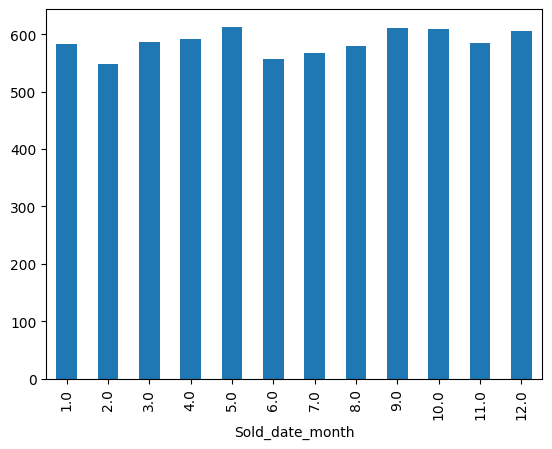

In [69]:
grouped.plot.bar()